# Border / Frame Hiding Method demonstration simple

In [1]:
import PIL.Image as img # read in images
import matplotlib.pyplot as plt # plotting
import numpy as np # array manipulation

In [2]:
!ls

 frame_border.ipynb               imstillhere.png
 hide_in_me.jpg                   inject_me.png
 hide_me_in.png                  'smiley fucked up but brought back.jpg'
 high_res_containing_smiley.png   test.jpg
 higher_res.png                   todo


In [3]:
# test image files
photo_to_hide = "hide_me_in.png"
photo_for_concealment = "hide_in_me.jpg"

# read in images
hide_me = img.open(photo_to_hide)
hide_in_me = img.open(photo_for_concealment)

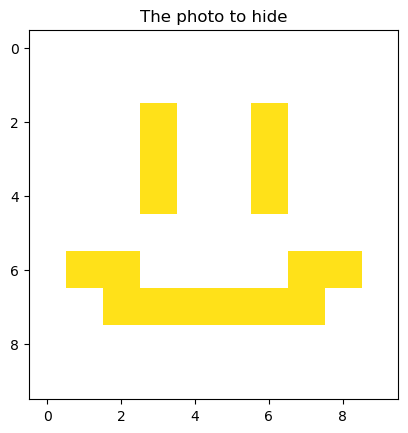

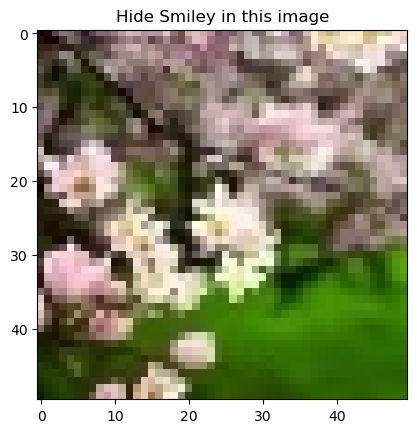

In [4]:
# display test images
plt.imshow(hide_me)
plt.title("The photo to hide")
plt.show()
plt.imshow(hide_in_me)
plt.title("Hide Smiley in this image")
plt.show()

In [5]:
# convert the smiley(image to hide) into a 1 dimensonal array but save its orignal shape for recreation

# grab photo to hide orignal resolution for recreation
hidden_photo_org_res = hide_me.size
print(f"smiley original resolution = {hidden_photo_org_res} pixels")
print(f"smiley number of pixels = {hidden_photo_org_res[0] * hidden_photo_org_res[1]}")

# images not one dimensional
print("\nremember images not 1 matrix :(")

smiley original resolution = (10, 10) pixels
smiley number of pixels = 100

remember images not 1 matrix :(


# TODO: remember images at least 3 dimensions most likely 4

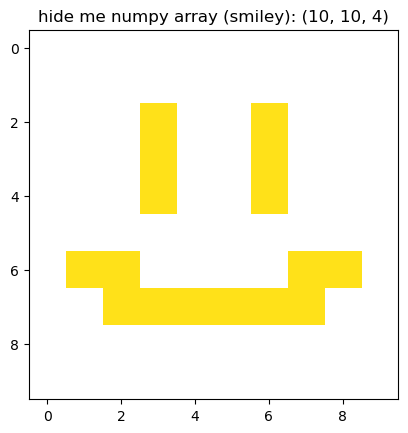

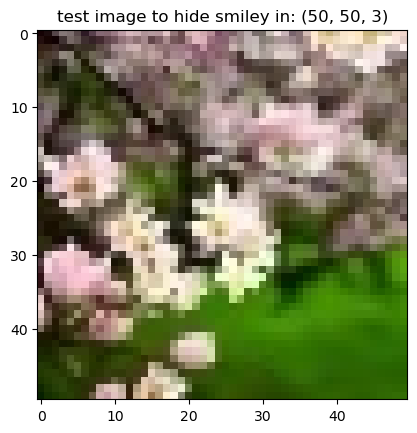

In [6]:
# convert both to numpy arrays and redraw
ar_hide_me = np.array(hide_me)
ar_hide_in_me = np.array(hide_in_me)

# show hide me test image
plt.imshow(ar_hide_me)
plt.title(f"hide me numpy array (smiley): {ar_hide_me.shape}")
plt.show()

# show image to hide smiley in
plt.imshow(ar_hide_in_me)
plt.title(f"test image to hide smiley in: {ar_hide_in_me.shape}")
plt.show()


## So given our test images how many pixels do we have to encode in the border and what is the size limit of a border of 1 pixels placed around the test image for injection?

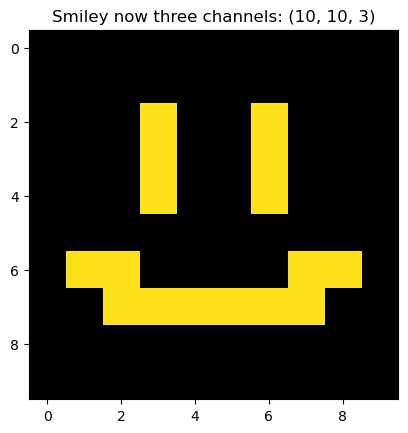

In [7]:
# also we have conflicting types and shapes jpg 3 (rgb) png (rgba)
# convert smiley to 3 channels (remove opacity/transparency dimension)
ar_hide_me = ar_hide_me[:,:,:3]

# redraw
plt.imshow(ar_hide_me)
plt.title(f"Smiley now three channels: {ar_hide_me.shape}")
plt.show()

In [8]:
#  TODO: calculate a single pixel border count for our test image of 50 x 50 x 3



Text(0.5, 1.0, 'smiley as single 3 channel column vector (100, 1, 3)')

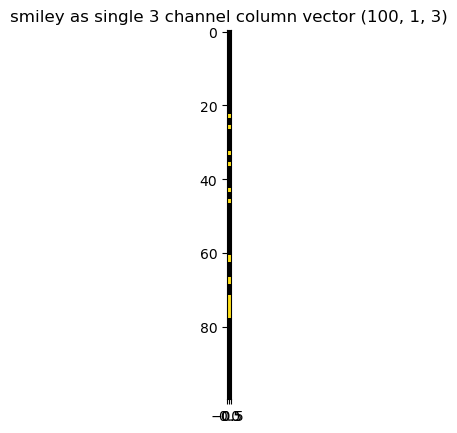

In [9]:
hide_me_vec = ar_hide_me.reshape([100, 1, 3])
plt.imshow(hide_me_vec)
plt.title(f"smiley as single 3 channel column vector {hide_me_vec.shape}")

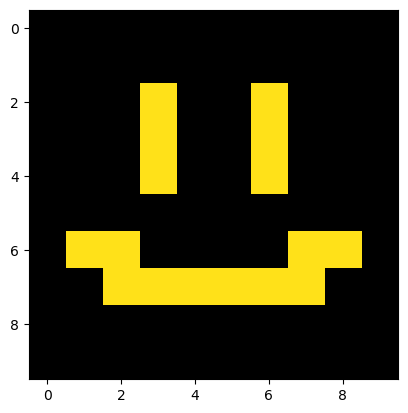

In [10]:
# test reshape and replot
# recreation from 1x3 vector
org_smiley = hide_me_vec.reshape([10,10,3])
plt.imshow(org_smiley)

In [11]:
len(hide_me_vec[:,0])

100

Text(0.5, 1.0, 'drawing board to hold both images: (100, 51, 3)')

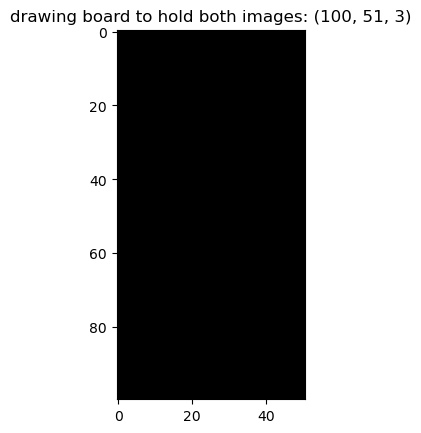

In [19]:
# define empty matrix to hold orignal image and injected smiley
# shape will be extended by column vector of mutated smiley
# orignal storage image is 50 down and smiley is 100 down so we need 100 pixels down
# orignal storage image is 50 across, we only need to insert 1 column of pixels so 51 across
drawing_board = np.zeros([100, 51, 3])
plt.imshow(test)
plt.title(f"drawing board to hold both images: {drawing_board.shape}")

In [18]:
test = np.copy(drawing_board)

In [20]:
test.shape

(100, 51, 3)

In [21]:
# insert red channel
test[:, 0, 0] = hide_me_vec[:, 0, 0]
# insert green channel
test[:, 0, 1] = hide_me_vec[:, 0, 1]
# insert blue channel
test[:, 0, 2] = hide_me_vec[:, 0, 2]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


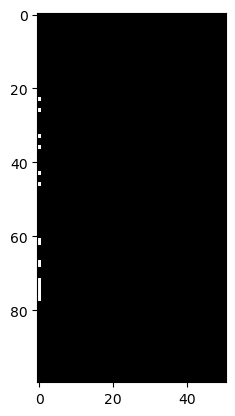

In [22]:
plt.imshow(test)

In [23]:
# now inject our cover up image (hide in me) into drawing board
test[:50, 1:, :].shape

(50, 50, 3)

In [24]:
test[:50, 1:, :] = ar_hide_in_me

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


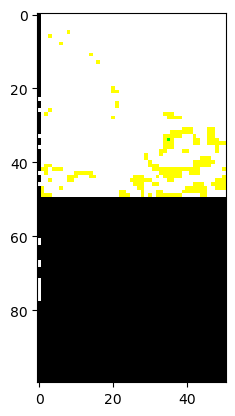

In [25]:
plt.imshow(test)

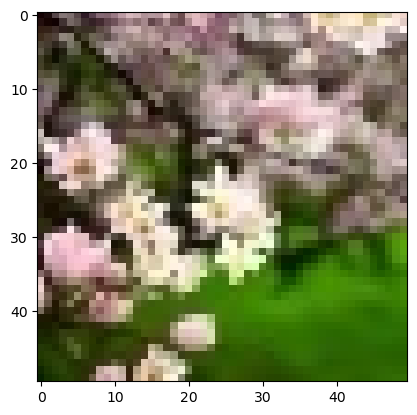

In [26]:
plt.imshow(ar_hide_in_me)

In [27]:
np.unique(ar_hide_in_me)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [28]:
np.unique(ar_hide_me)

array([  0,  25, 225, 255], dtype=uint8)

In [29]:
fuck_it = img.open("inject_me.png")

In [30]:
fuck_it = np.array(fuck_it)[:,:,:3]

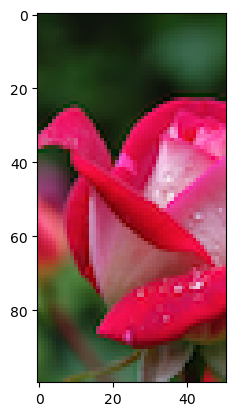

In [31]:
plt.imshow(fuck_it)

In [32]:
fuck_it.shape

(100, 51, 3)

In [33]:
# insert rgb of smiley into first pixel column of fuck it
fuck_it[:, 0, 0] = hide_me_vec[:, 0, 0]
fuck_it[:, 0, 1] = hide_me_vec[:, 0, 1]
fuck_it[:, 0, 2] = hide_me_vec[:, 0, 2]

In [34]:
fuck_it.shape

(100, 51, 3)

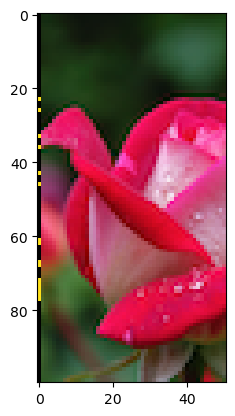

In [35]:
plt.imshow(fuck_it)

In [36]:
plt.imsave("test.jpg", fuck_it)

In [37]:
# saved fuck it as new image

In [38]:
# pull it back out
# read it in
img_in_img_file = "test.jpg"
img_in_img = img.open(img_in_img_file)
# convert to matrix
img_in_img = np.array(img_in_img)

In [39]:
# grab the first column of pixels 100 down
smiley_reconstruct = img_in_img[:, 0, :]

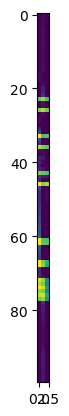

In [40]:
# plot column vector of smiley pulled from img in img
plt.imshow(smiley_reconstruct)

In [41]:
smiley_reconstruct.shape

(100, 3)

In [42]:
smiley_reconstruct = smiley_reconstruct.reshape([10,10,3])

In [43]:
plt.imsave("smiley fucked up but brought back.jpg", arr=smiley_reconstruct)


# attempt on higher res concealer image

In [44]:
# read in high res image
high_res_file = "higher_res.png"
high_res_img_png = img.open(high_res_file)


Text(0.5, 1.0, '(1314, 1920, 3)')

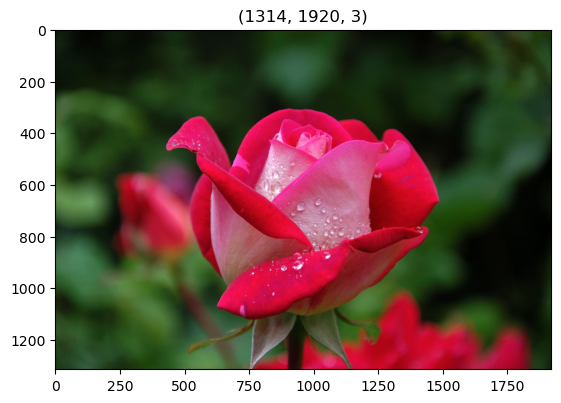

In [45]:
# convert to numpy trash alpha channel
high_res_concealer = np.array(high_res_img_png)[:,:,:3]
plt.imshow(high_res_concealer)
plt.title(f"{high_res_concealer.shape}")

In [46]:
# inject smiley (aka hide_me_vec)
# red channel
high_res_concealer[:100, 0, 0] = hide_me_vec[:, 0, 0]
# green channel
high_res_concealer[:100, 0, 1] = hide_me_vec[:, 0, 1]
# blue channel
high_res_concealer[:100, 0, 2] = hide_me_vec[:, 0, 2]

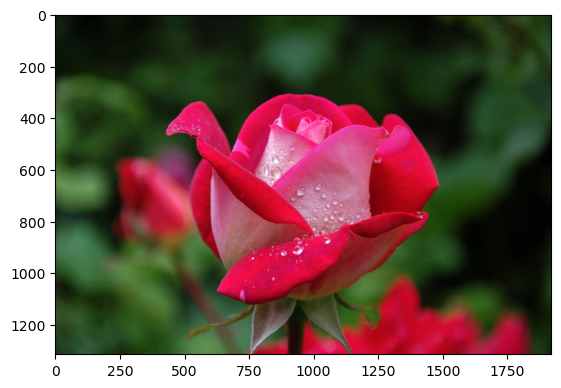

In [48]:
plt.imshow(high_res_concealer)

In [49]:
plt.imsave(fname="/roottsyakn.png", arr=high_res_concealer)

FileNotFoundError: [Errno 2] No such file or directory: '~/tsyakn.png'

In [ ]:
# pull out smiley
im_still_here = high_res_concealer[:100, 0, :]

In [ ]:
plt.imshow(im_still_here.reshape([10, 10, 3]))

In [ ]:
plt.imsave(fname="imstillhere.png", arr=im_still_here.reshape([10, 10, 3]))

In [ ]:
plt.imshow(high_res_concealer[:50, :20,:])